In [1]:
import numpy as np
np.random.seed(123)

# data
from tensorflow.keras.datasets import mnist

# plot
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

from numba import njit

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# resize each image from 28 x 28 to vector and normalize to maximum 1
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255
X_test = X_test.reshape(X_test.shape[0], 28*28) / 255

# validation split proportion
validation_split = 0.1

# create validation data

# observations
obs = y_train.shape[0]
idx = np.arange(obs)

# shuffle indices
np.random.shuffle(idx)

# data
split_idx = int(validation_split * obs)
X_val, X_train = X_train[ :split_idx], X_train[split_idx: ]
y_val, y_train = y_train[ :split_idx], y_train[split_idx: ]

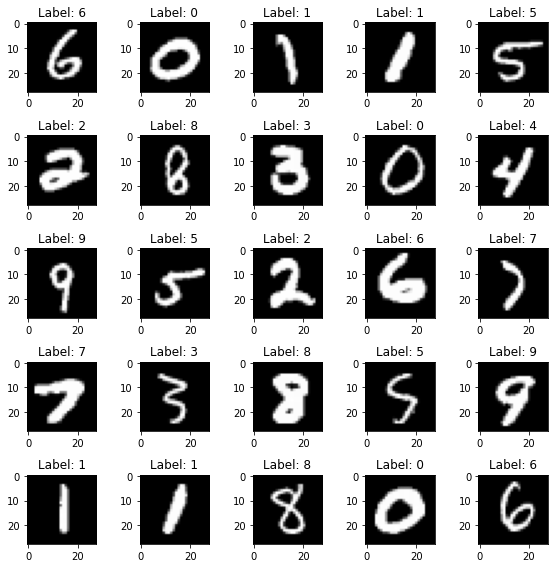

In [3]:
# show data
plt.figure(figsize=[8, 8])
rows, columns = 5, 5

for i in range(rows*columns):
    plt.subplot(rows,columns,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    
plt.tight_layout()
plt.show()

In [6]:
@njit
def get_nearest_neighbor(data, X_train=X_train, y_train=y_train):
    '''
    Parameters
    ----------
    data : vector to predict
    
    X_train : labeled cluster data
    
    y_train : label vector
    '''
    sq_diff = (data - X_train)**2 # squared difference

    ssd = sq_diff.sum(axis=1) # sum of squared (squared Euclidean distance)

    argmin = np.argmin(ssd) # find minimum distance
    
    return y_train[argmin]

# too slow
# @njit
# def predict(X_val=X_val, X_train=X_train, y_train=y_train):
#     '''
#     Parameters
#     ----------
#     X_val : data matrix
    
#     X_train : labeled cluster data

#     y_train : label vector
#     '''
#     predictions = np.zeros(X_val.shape[0])

#     for i, x in enumerate(X_val):

#         predictions[i] = get_nearest_neighbor(x, X_train, y_train)
        
#     return predictions